Contents of 'Faulty_solar_panel':
['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']

Images in class folder 'Bird-drop':
['Bird (1).jpeg', 'Bird (10).jpg', 'Bird (100).jpg', 'Bird (101).jpg', 'Bird (102).jpg']
label
Clean                193
Bird-drop            191
Dusty                190
Snow-Covered         123
Electrical-damage    103
Physical-Damage       69
Name: count, dtype: int64
Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 250ms/step - accuracy: 0.2781 - loss: 1.9186
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 242ms/step - accuracy: 0.5557 - loss: 1.1488
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 242ms/step - accuracy: 0.6769 - loss: 0.8733
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 238ms/step - accuracy: 0.7093 - loss: 0.7659
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 246ms/step - accuracy: 0.7702 - loss: 0.6839
Epoch 6/10


28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 239ms/step - accuracy: 0.7881 - loss: 0.5947
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 236ms/step - accuracy: 0.8285 - loss: 0.5715
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 233ms/step - accuracy: 0.8171 - loss: 0.5104
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 242ms/step - accuracy: 0.8671 - loss: 0.4565
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 240ms/step - accuracy: 0.8537 - loss: 0.4405


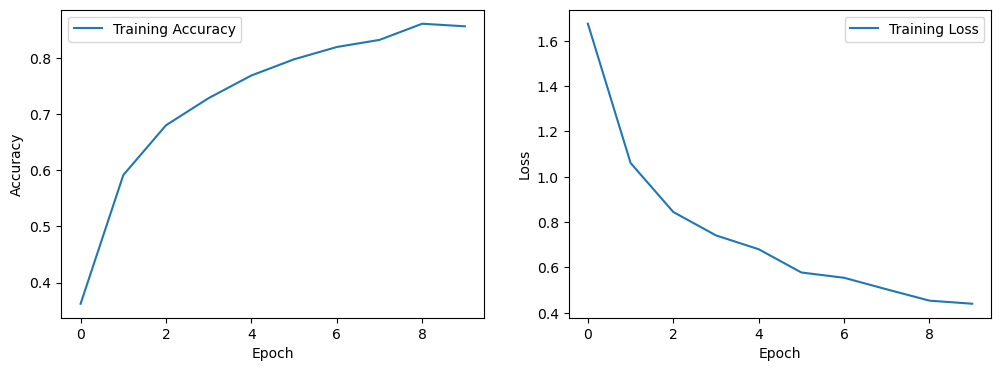

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 286ms/step - accuracy: 0.6750 - loss: 0.9459 - learning_rate: 1.0000e-04
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 286ms/step - accuracy: 0.8978 - loss: 0.3407 - learning_rate: 1.0000e-04
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 278ms/step - accuracy: 0.9560 - loss: 0.1996 - learning_rate: 1.0000e-04
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 293ms/step - accuracy: 0.9595 - loss: 0.1475 - learning_rate: 1.0000e-04
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 292ms/step - accuracy: 0.9775 - loss: 0.1010 - learning_rate: 1.0000e-04
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 291ms/step - accuracy: 0.9879 - loss: 0.0793 - learning_rate: 1.0000e-04
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 294ms/step - accuracy: 0.9809 - loss: 0.0603 - learning_rate: 1.0000e-04
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 297ms/step - accuracy: 0.9959 - loss: 0.0461 - learning_rate: 1.0000e-04
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 287ms/step - accuracy: 0.9986 - loss: 

In [1]:
# Install required libraries
!pip install numpy==1.24.3 matplotlib opencv-python tensorflow

# Extract dataset zip file
import zipfile
with zipfile.ZipFile('SolarPanelFaultyDetection.zip', 'r') as zip_ref:
    zip_ref.extractall()

# List dataset folder contents and class folders
import os
dataset_path = 'Faulty_solar_panel'
print(f"Contents of '{dataset_path}':")
print(os.listdir(dataset_path))
first_class_folder = os.listdir(dataset_path)[0]
print(f"\nImages in class folder '{first_class_folder}':")
print(os.listdir(os.path.join(dataset_path, first_class_folder))[:5])

# Prepare labels dataframe
import pandas as pd
labels = []
class_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
for class_folder in class_folders:
    folder_path = os.path.join(dataset_path, class_folder)
    for img_name in os.listdir(folder_path):
        if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            relative_img_path = os.path.join(class_folder, img_name)
            labels.append({'filename': relative_img_path, 'label': class_folder})
df = pd.DataFrame(labels)
csv_filename = 'solar_fault_dataset_labels.csv'
df.to_csv(csv_filename, index=False)
print(df['label'].value_counts())

# Map labels to indices
csv_path = 'solar_fault_dataset_labels.csv'
df = pd.read_csv(csv_path)
label_names = sorted(df['label'].unique())
label_to_index = {name: idx for idx, name in enumerate(label_names)}
df['label_index'] = df['label'].map(label_to_index)

# Prepare TensorFlow dataset pipeline with image loading and preprocessing (resize to 224x224 and normalize)
import tensorflow as tf
import pathlib

base_path = pathlib.Path('Faulty_solar_panel')
image_paths = [str((base_path / fname).as_posix()) for fname in df['filename']]
labels = df['label_index'].values

path_ds = tf.data.Dataset.from_tensor_slices(image_paths)
label_ds = tf.data.Dataset.from_tensor_slices(labels)
image_label_ds = tf.data.Dataset.zip((path_ds, label_ds))

def load_and_preprocess_img(path, label):
    image_file = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image_file, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0
    return image, label

dataset = image_label_ds.map(load_and_preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
batch_size = 32
dataset = dataset.shuffle(buffer_size=len(df)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Create model using MobileNetV2 pretrained CNN (exclude top layers), add GAP, dropout, and dense output layer (6 classes)
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(6, activation='softmax')  # 6 classes
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model first with frozen base model for feature extraction
history = model.fit(dataset, epochs=10)

# Visualize training accuracy and loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Fine-tune model by unfreezing last 20 layers of base model, using lower learning rate and callback for LR reduction
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=2, min_lr=1e-6, verbose=1)

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(dataset, epochs=20, callbacks=[reduce_lr])

# (Optional) Add data augmentation here for further training improvement



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

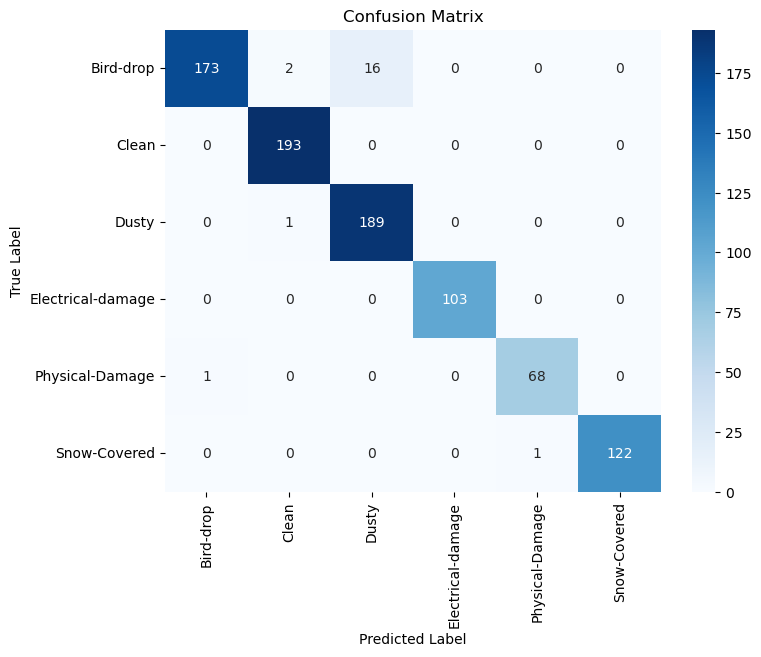

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 322ms/step - accuracy: 0.9967 - loss: 0.0168 - learning_rate: 1.0000e-04
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 311ms/step - accuracy: 0.9977 - loss: 0.0125 - learning_rate: 1.0000e-04
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 296ms/step - accuracy: 0.9957 - loss: 0.0177 - learning_rate: 1.0000e-04
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 305ms/step - accuracy: 0.9935 - loss: 0.0236 - learning_rate: 1.0000e-04
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 294ms/step - accuracy: 0.9966 - loss: 0.0202 - learning_rate: 2.0000e-05
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 314ms/step - accuracy: 0.9975 - loss: 0.0137 - learning_rate: 2.0000e-05
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 303ms/step - accuracy: 0.9947 - loss: 0.0152 - learning_rate: 2.0000e-05
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 295ms/step - accuracy: 0.9941 - loss: 0.0189 - learning_rate: 2.0000e-05
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 302ms/step - accuracy: 0.9951 - loss: 

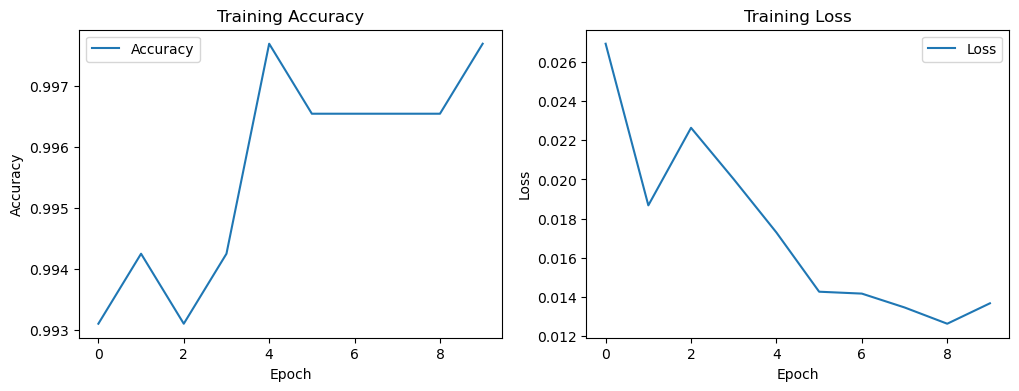

In [2]:
# 1. Evaluate model with classification metrics and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

true_labels = []
pred_labels = []
for images, labels in dataset.unbatch().batch(32):
    preds = model.predict(images)
    true_labels.extend(labels.numpy())
    pred_labels.extend(np.argmax(preds, axis=1))

print(classification_report(true_labels, pred_labels, target_names=label_to_index.keys()))

cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_to_index.keys(), yticklabels=label_to_index.keys())
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


# 2. Fine-tune base model layers (e.g., top 50 layers)
base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False

from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# 3. Define callbacks for better training control
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=2, min_lr=1e-6)


# 4. Retrain model with fine-tuning and callbacks
history_finetune = model.fit(dataset, epochs=10, callbacks=[early_stop, reduce_lr])


# 5. Plot training accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_finetune.history['accuracy'], label='Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_finetune.history['loss'], label='Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [4]:
#Save the model
model.save('solar_fault_detection_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


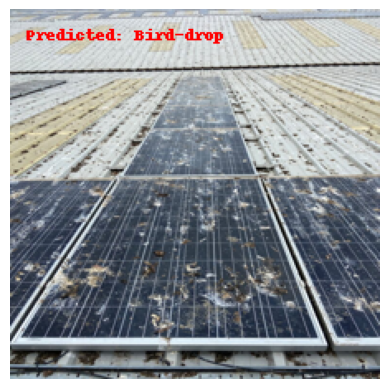

Predicted Fault Type: Bird-drop


In [11]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

model = load_model('solar_fault_detection_model.keras')

# Label mapping (from your dataset)
label_to_index = {'Bird-drop': 0, 'Clean': 1, 'Dusty': 2, 'Electrical-damage': 3, 'Physical-Damage': 4, 'Snow-Covered': 5}
index_to_label = {v: k for k, v in label_to_index.items()}

def preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img, img_array

def predict_fault(image_path, model):
    original_img, img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    pred_class_idx = np.argmax(prediction)
    pred_label = index_to_label[pred_class_idx]
    
    # Mark the predicted label on the image
    img_marked = original_img.copy()
    draw = ImageDraw.Draw(img_marked)
    font = ImageFont.load_default()
    draw.text((10, 10), f"Predicted: {pred_label}", fill='red', font=font)
    
    # Show the marked image
    plt.imshow(img_marked)
    plt.axis('off')
    plt.show()
    
    print(f"Predicted Fault Type: {pred_label}")

# Example usage:
# Replace 'random_solar_panel.jpg' with your image file path
predict_fault('bird-deterrents-solar-panels.jpg', model)
